# Lab 6. Data Modeling II - Part 1: SVM

In [1]:
######################################################################

### Lab Assignment 6.1.

In this lab, you'll get started with support vector classifier by revisiting UCI's [wheat-seeds dataset](https://archive.ics.uci.edu/ml/datasets/seeds). First, you will benchmark how long it takes to train and predict with SVC relative to how long K-Neighbors took to train and test, and then you'll compare the decision boundary plot produced by the two.

1. Start by reviewing the starter code located in Module6/<b>assignment1.py</b> and of course the wheat dataset in Module6/Datasets/<b>wheat.data</b>. Be sure to read through <b>everything</b>, so that you know exactly what is being asked of you...
2. Add in the KNN and SVC classifiers
3. Load up your dataset properly and prune it
4. Run the convenience benchmark and plotting functions
5. Then, answer the following questions.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%pylab inline 
import pandas as pd
import numpy as np 
import time

Populating the interactive namespace from numpy and matplotlib


In [2]:
# INFO: Your Parameters.
# You can adjust them after completing the lab
C = 1
kernel = 'linear'
iterations = 5000   # TODO: Change to 200000 once you get to Question#2

In [3]:
# INFO: You can set this to false if you want to
# draw the full square matrix
FAST_DRAW = True

In [4]:
# Load up the wheat dataset into dataframe 'X'
# Verify you did it properly.
# Indices shouldn't be doubled, nor weird headers...
X = pd.read_csv('Module6/Datasets/wheat.data', index_col=0)
X.head()

,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
id,,,,,,,,
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,kama


In [5]:
# INFO: An easy way to show which rows have nans in them
print X[pd.isnull(X).any(axis=1)]

      area  perimeter  compactness  length  width  asymmetry  groove  \
id                                                                     
7    14.11      14.10       0.8911  5.4200  3.302      2.700     NaN   
35   16.12      15.00          NaN  0.9000    NaN      5.709   3.485   
60   11.42      12.86       0.8683  5.0080  2.850      2.700     NaN   
135  15.38      14.66       0.8990  5.4770  3.465      3.600     NaN   
169  11.24      13.00          NaN  0.8359  5.090      2.715   3.521   
170  11.02      13.00          NaN  0.8189  5.325      2.701   6.735   
201  12.67      13.32       0.8977  4.9840  3.135      2.300     NaN   

    wheat_type  
id              
7     canadian  
35    canadian  
60    canadian  
135   canadian  
169   canadian  
170   canadian  
201   canadian  


In [6]:
# same (in the dataframe form.. )
X[X.isnull().any(axis=1)]

,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
id,,,,,,,,
7,14.11,14.10,0.8911,5.4200,3.302,2.700,NaN,canadian
35,16.12,15.00,NaN,0.9000,NaN,5.709,3.485,canadian
60,11.42,12.86,0.8683,5.0080,2.850,2.700,NaN,canadian
135,15.38,14.66,0.8990,5.4770,3.465,3.600,NaN,canadian
169,11.24,13.00,NaN,0.8359,5.090,2.715,3.521,canadian
170,11.02,13.00,NaN,0.8189,5.325,2.701,6.735,canadian
201,12.67,13.32,0.8977,4.9840,3.135,2.300,NaN,canadian


In [7]:
X.isnull().sum()

area           0
perimeter      0
compactness    3
length         0
width          1
asymmetry      0
groove         4
wheat_type     0
dtype: int64

In [8]:
# Drop any row with a nan
X_dr = X # X will be reused later for imputation with mean
X_dr.dropna(axis=0)
X_dr.isnull().sum()

area           0
perimeter      0
compactness    0
length         0
width          0
asymmetry      0
groove         0
wheat_type     0
dtype: int64

In [9]:
# INFO: # In the future, you might try setting the nan values to the
# mean value of that column, the mean should only be calculated for
# the specific class rather than across all classes, now that you
# have the labels

In [10]:
# Copy the labels out of the dset into variable 'y' then Remove
# them from X. Encode the labels, using the .map() trick we showed
# you in Module 5 -- canadian:0, kama:1, and rosa:2
X_dr.wheat_type.unique()

array(['kama', 'canadian', 'rosa'], dtype=object)

In [11]:
y = X_dr.wheat_type.copy()
print y.unique()
print y.head()

['kama' 'canadian' 'rosa']
id
0    kama
1    kama
2    kama
3    kama
4    kama
Name: wheat_type, dtype: object


In [12]:
# using map()
y_test = y.map({'canadian': 0, 'kama': 1, 'rosa': 2})

print y_test.head()
print y_test.unique()

id
0    1
1    1
2    1
3    1
4    1
Name: wheat_type, dtype: int64
[1 0 2]


In [13]:
# using astype()
y = y.astype('category').cat.codes
print y.head()
print y.unique()

id
0    1
1    1
2    1
3    1
4    1
dtype: int8
[1 0 2]


In [14]:
X_dr.drop(labels=['wheat_type'], inplace=True, axis=1)
X_dr.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,area,perimeter,compactness,length,width,asymmetry,groove
id,,,,,,,
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [15]:
# Split your data into test / train sets
# Your test size can be 30% with random_state 7.
# Use variable names: X_train, X_test, y_train, y_test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dr, y, test_size=0.3, random_state=7)

In [16]:
len(X_train), len(X_test), len(y_train), len(y_test)

(142, 61, 142, 61)

In [17]:
# Create an SVC classifier named svc
# Use a linear kernel, and set the C value to C
from sklearn.svm import SVC
svc = SVC(kernel=kernel, C=C)

In [18]:
# Create an KNeighbors classifier named knn
# Set the neighbor count to 5
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [24]:
def drawPlots(model, wintitle='Figure 1'):
    # INFO: A convenience function for you
    # You can use this to break any higher-dimensional space down
    # And view cross sections of it.

    # If this line throws an error, use plt.style.use('ggplot') instead
    mpl.style.use('ggplot') # Look Pretty

    padding = 3
    resolution = 0.5
    max_2d_score = 0

    y_colors = ['#ff0000', '#00ff00', '#0000ff']
    my_cmap = mpl.colors.ListedColormap(['#ffaaaa', '#aaffaa', '#aaaaff'])
    colors = [y_colors[i] for i in y_train]
    num_columns = len(X_train.columns)

    fig = plt.figure(figsize(9,9))
    fig.canvas.set_window_title(wintitle)

    cnt = 0
    for col in range(num_columns):
        for row in range(num_columns):
            # Easy out
            if FAST_DRAW and col > row:
                cnt += 1
                continue

            ax = plt.subplot(num_columns, num_columns, cnt + 1)
            plt.xticks(())
            plt.yticks(())

            # Intersection:
            if col == row:
                plt.text(0.5, 0.5, X_train.columns[row], verticalalignment='center', horizontalalignment='center', fontsize=12)
                cnt += 1
                continue


            # Only select two features to display, then train the model
            X_train_bag = X_train.ix[:, [row,col]]
            X_test_bag = X_test.ix[:, [row,col]]
            model.fit(X_train_bag, y_train)

            # Create a mesh to plot in
            x_min, x_max = X_train_bag.ix[:, 0].min() - padding, X_train_bag.ix[:, 0].max() + padding
            y_min, y_max = X_train_bag.ix[:, 1].min() - padding, X_train_bag.ix[:, 1].max() + padding
            xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                                 np.arange(y_min, y_max, resolution))

            # Plot Boundaries
            plt.xlim(xx.min(), xx.max())
            plt.ylim(yy.min(), yy.max())

            # Prepare the contour
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, cmap=my_cmap, alpha=0.8)
            plt.scatter(X_train_bag.ix[:, 0], X_train_bag.ix[:, 1], c=colors, alpha=0.5)


            score = round(model.score(X_test_bag, y_test) * 100, 3)
            plt.text(0.5, 0, "Score: {0}".format(score), transform = ax.transAxes, horizontalalignment='center', fontsize=8)
            max_2d_score = score if score > max_2d_score else max_2d_score

            cnt += 1

    print "Max 2D Score: ", max_2d_score
    fig.set_tight_layout(True)

In [25]:
def benchmark(model, wintitle='Figure 1'):
    print '\n\n' + wintitle + ' Results'
    s = time.time()
    for i in range(iterations):
        # train the classifier on the training data / labels:
        res = model.fit(X_train, y_train)
    print "{0} Iterations Training Time: ".format(iterations), time.time() - s


    s = time.time()
    for i in range(iterations):
        # score the classifier on the testing data / labels:
        score = res.score(X_test, y_test)
        
    print "{0} Iterations Scoring Time: ".format(iterations), time.time() - s
    print "High-Dimensionality Score: ", round((score*100), 3)

In [21]:
benchmark(knn, 'KNeighbors')
benchmark(svc, 'SVC')



KNeighbors Results
5000 Iterations Training Time:  2.72331404686
5000 Iterations Scoring Time:  5.32859706879
High-Dimensionality Score:  83.607


SVC Results
5000 Iterations Training Time:  5.18040513992
5000 Iterations Scoring Time:  2.45851302147
High-Dimensionality Score:  86.885


Max 2D Score:  90.164


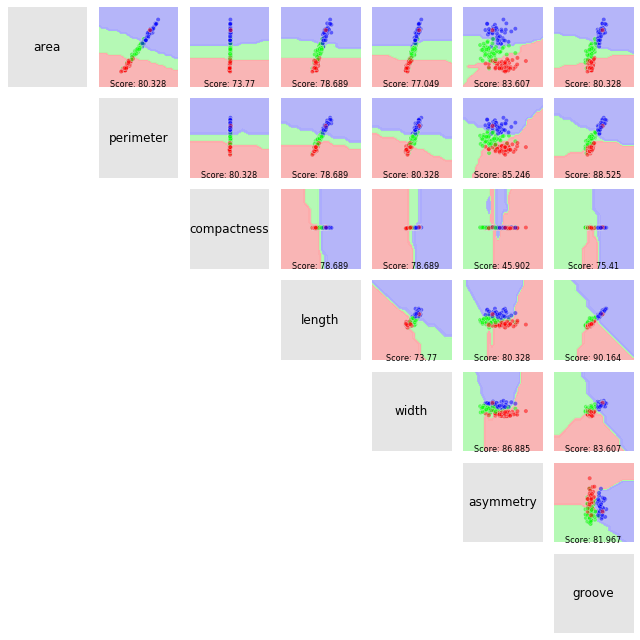

In [26]:
drawPlots(knn, 'KNeighbors')
plt.show()

Max 2D Score:  93.443


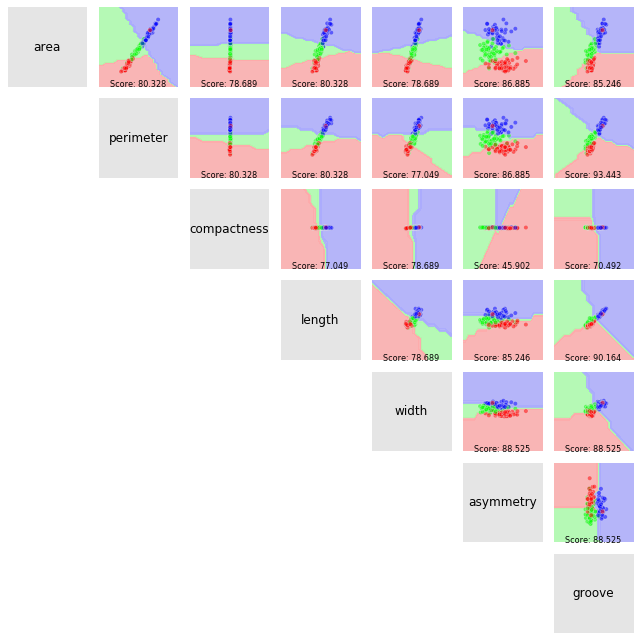

In [27]:
drawPlots(svc, 'SVC')

In [28]:
# BONUS: After submitting your answers, toy around with
# gamma, kernel, and C.
C = 10
kernel = 'linear'
iterations = 5000   

In [29]:
svc = SVC(kernel=kernel, C=C)
knn = KNeighborsClassifier(n_neighbors=5)

In [30]:
benchmark(knn, 'KNeighbors')
benchmark(svc, 'SVC')



KNeighbors Results
5000 Iterations Training Time:  2.79240894318
5000 Iterations Scoring Time:  5.30661416054
High-Dimensionality Score:  83.607


SVC Results
5000 Iterations Training Time:  12.3630678654
5000 Iterations Scoring Time:  2.41786789894
High-Dimensionality Score:  91.803


Max 2D Score:  90.164


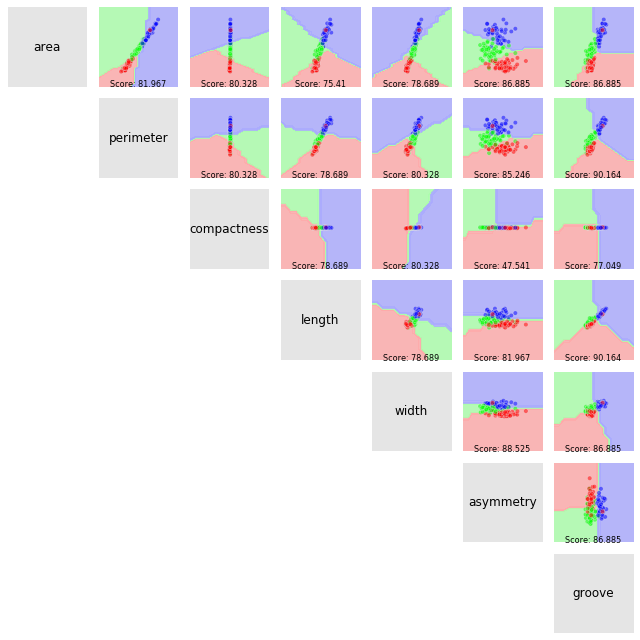

In [31]:
drawPlots(svc, 'SVC')

In [35]:
C = 1
kernel = 'poly'
iterations = 5000   

In [36]:
svc = SVC(kernel=kernel, C=C)
knn = KNeighborsClassifier(n_neighbors=5)

In [37]:
benchmark(knn, 'KNeighbors')
benchmark(svc, 'SVC')



KNeighbors Results
5000 Iterations Training Time:  2.70341014862
5000 Iterations Scoring Time:  5.23748493195
High-Dimensionality Score:  83.607


SVC Results
5000 Iterations Training Time:  168.25417304
5000 Iterations Scoring Time:  2.43751502037
High-Dimensionality Score:  90.164


Max 2D Score:  95.082


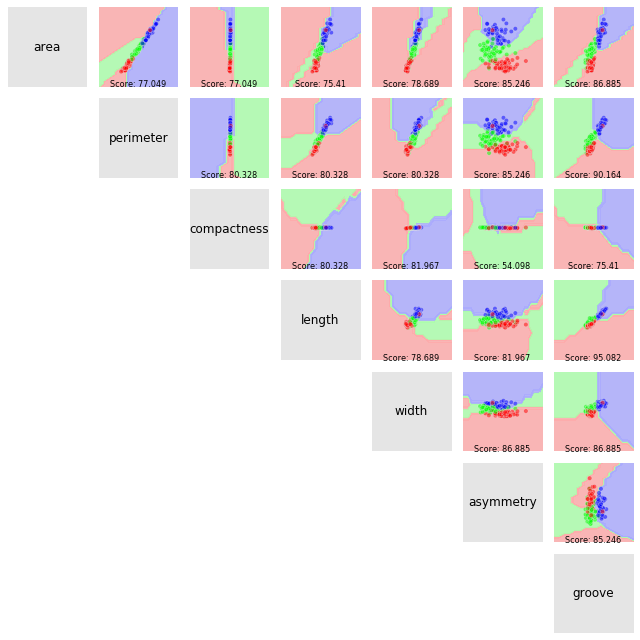

In [38]:
drawPlots(svc, 'SVC')

In [39]:
C = 10
kernel = 'rbf'
iterations = 5000   

In [40]:
svc = SVC(kernel=kernel, C=C)
knn = KNeighborsClassifier(n_neighbors=5)

In [41]:
benchmark(knn, 'KNeighbors')
benchmark(svc, 'SVC')



KNeighbors Results
5000 Iterations Training Time:  2.92965316772
5000 Iterations Scoring Time:  5.29152798653
High-Dimensionality Score:  83.607


SVC Results
5000 Iterations Training Time:  5.35622000694
5000 Iterations Scoring Time:  2.74158000946
High-Dimensionality Score:  85.246


Max 2D Score:  91.803


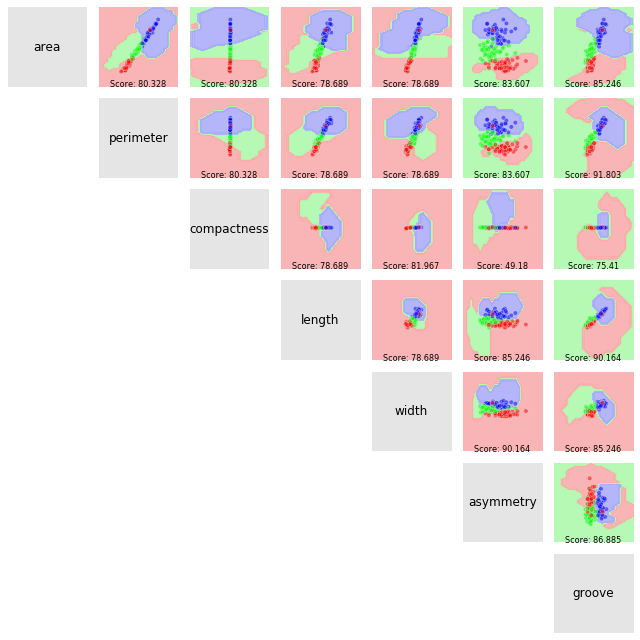

In [42]:
drawPlots(svc, 'SVC')

### Lab Questions 6.1.

##### Lab Question 1 (1 point possible)

In this lab, you run KNeighbors and SVC in high dimensional feature space, 5000 times! Ensure you don't have any spyware, movies, games, video editing, or other hardware intensive apps running while you execute the timed runs.

After the high dimensional classification and benchmarking finishes, the lab plots for you a matrix of 2D, feature vs feature plots against one another. This way, you can see how each pair of features stack against the other. Since a square matrix is produced, there are two copies of each plot, although the axes are swapped, and that is controllable by the FAST_DRAW parameter.

Which of the four tests produced the highest scoring result?

- (A) KNeighbors High Dimensionality Score
- (B) KNeighbors "Best" 2D Score
- (C) SVC High Dimensionality Score
- (D) SVC "Best" 2D Score

<b>* My answer</b>: (D) (<== <b>Correct!</b>)

<b>* Explanation</b>: 
SVC in high dimensions, even with a provided kernel, still attempts to find the best linearly separable plane to split your classes. If you have 'dirty' features thrown into the mix, it's entirely possible they will end up hurting your overall SVC performance, as opposed to just having a few really good features. These are the results you should have received, if you did not alter the parameters before submitting your score:
- KNeighbors Results
    - 5000 Iterations Training Time: 1.88873505592
    - 5000 Iterations Scoring Time: 3.78048992157
    - High-Dimensionality Score: 83.607
    - Max 2D Score: 90.164

- SVC Results
    - 5000 Iterations Training Time: 3.79915714264
    - 5000 Iterations Scoring Time: 1.65462088585
    - High-Dimensionality Score: 86.885
    - Max 2D Score: 93.443


##### Lab Question 2 (1 point possible)

Change iterations from 5000 to 200,000 and then re-run your lab with the default parameters.

Ensure you don't have anything else processor intensive running on your machine for the duration of time it takes to do its number crunching (should be 1-10 minutes on modern laptops).

Which of these four computations was *fastest* to calculate?
- (A) KNeighbors Training Time
- (B) KNeighbors Testing Time
- (C) SVC Training Time
- (D) SVC Testing Time

In [45]:
C = 1
kernel = 'linear'
iterations = 200000

In [46]:
svc = SVC(kernel=kernel, C=C)
knn = KNeighborsClassifier(n_neighbors=5)

In [47]:
benchmark(knn, 'KNeighbors')
benchmark(svc, 'SVC')



KNeighbors Results
200000 Iterations Training Time:  105.34788084
200000 Iterations Scoring Time:  207.85125494
High-Dimensionality Score:  83.607


SVC Results
200000 Iterations Training Time:  203.650987148
200000 Iterations Scoring Time:  95.8985538483
High-Dimensionality Score:  86.885


<b>* My answer</b>: (B) (<== <b>Correct!</b>)

<b>* Explanation</b>: 
SVC Testing is extremely fast. It is essentially just seeing what side of the hyperplane a point is on.

##### 참고자료
*  http://scikit-learn.org/stable/modules/svm.html#kernel-functions

In [ ]:
######################################################################

### Lab Assignment 6.2.

<b>"Is that a 1 or a 7?"</b>

Even though the United States Postal Service, as an organization, was formed in 1971, it traces its roots back to the Post Office Department, an organization formed in 1792 by President Benjamin Franklin. It later evolved into a cabinet-level department in 1872, before finally being transformed into the USPS we know today in 1971, as an agency of the U.S. government.

Back in the day, all mail was hand read and delivered. Even up the turn of the 20th century, antiquated techniques such as the pigeonhole method from colonial times were used for mail-handling. During the 1950's, the post office started intense research on the coding systems used in many other countries and started down the process of automation. In 1982, the first computer-driven, OCR machine got installed in Los Angeles, and by the end of 1984, over 250 OCRs machines were installed in 118 major mail processing centers across the country and were processing an average of 6,200 pieces of mail per hour.

![Hand-Written Digits](http://courses.edx.org/asset-v1:Microsoft+DAT210x+4T2016+type@asset+block@handwritten.png "Hand-Written Digits")




Nowadays, the Postal Service is one of the world leaders in optical character recognition technology with machines reading nearly +98 percent of all hand-addressed letter mail and +99.5 percent of machine-printed mail, with a single tray sorting machines capable of sorting more than 18 million trays of mail per day.

Let's see if it's possible for you to train a support vector classifier on your computer in a few seconds using machine learning, and if your classification accuracy is similar or better than the advertised USPS stats. For this lab, you'll be making use of the [Optical Recognition of Handwritten Digits dataset](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits), provided courtesy of UCI's Machine Learning Repository.

1. Fully review the starter code stored in Module6/<b>assignment2.py</b>. If you have any questions about it, please ask them on the forum before you submit your lab answers. The dataset for the lab is stored at /Module6/Datasets/<b>optdigits.tes</b> and /Module6/Datasets/<b>optdigits.tra</b>. Check out the official dataset page at the UCI ML Repository to figure out why there are two files.
2. Make the requisite changes to get the project running, by providing the path to the .tes and .tra files.
3. Train your SVC classifier with the parameters provided, and keep testing until you're able to beat the classification abilities of the USPS.
4. Remember how important having a lot of samples is for machine learning? Try tossing out 96% of your samples, and see how it affects the accuracy of your highest accuracy support vector classifier.
5. Answer the questions.

In [61]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
#%pylab inline 
%matplotlib inline

from sklearn.svm import SVC

In [62]:
# The Dataset comes from:
# https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

def load(path_test, path_train):
    # Load up the data.
    # You probably could have written this..
    with open(path_test, 'r')  as f: testing  = pd.read_csv(f)
    with open(path_train, 'r') as f: training = pd.read_csv(f)

    # The number of samples between training and testing can vary
    # But the number of features better remain the same!
    n_features = testing.shape[1]

    X_test  = testing.ix[:,:n_features-1]
    X_train = training.ix[:,:n_features-1]
    y_test  = testing.ix[:,n_features-1:].values.ravel()
    y_train = training.ix[:,n_features-1:].values.ravel()

    #
    # Special:

    return X_train, X_test, y_train, y_test

In [63]:
# Pass in the file paths to the .tes and the .tra files
X_train, X_test, y_train, y_test = \
    load('Module6/Datasets/optdigits.tes', 'Module6/Datasets/optdigits.tra')

In [64]:
len(X_train), len(X_test), len(y_train), len(y_test)

(3822, 1796, 3822, 1796)

In [65]:
def peekData():
    # The 'targets' or labels are stored in y. The 'samples' or data is stored in X
    print "Peeking your data..."
    fig = plt.figure()

    cnt = 0
    for col in range(5):
        for row in range(10):
            plt.subplot(5, 10, cnt + 1)
            plt.imshow(X_train.ix[cnt,:].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
            plt.axis('off')
            cnt += 1
    fig.set_tight_layout(True)
    plt.show()


Peeking your data...


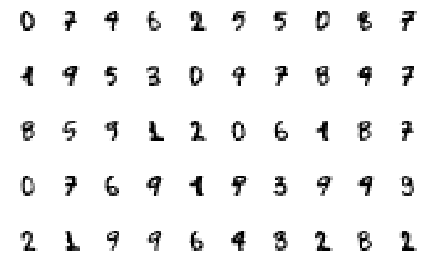

In [66]:
# Get to know your data. It seems its already well organized in
# [n_samples, n_features] form. Our dataset looks like (4389, 784).
# Also your labels are already shaped as [n_samples].
peekData()

In [67]:
# Create an SVC classifier. Leave C=1, but set gamma to 0.001
# and set the kernel to linear. Then train the model on the training
# data / labels:
print "Training SVC Classifier..."

model = SVC(C=1, gamma=0.001, kernel='linear')
model.fit(X_train, y_train)

Training SVC Classifier...


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [68]:
# Calculate the score of your SVC against the testing data
print "Scoring SVC Classifier..."

score = model.score(X_test, y_test)
print "Score:\n", score

Scoring SVC Classifier...
Score:
0.961024498886


In [69]:
def drawPredictions():
    fig = plt.figure(figsize(10,10))

    # Make some guesses
    y_guess = model.predict(X_test)

    # INFO: This is the second lab we're demonstrating how to
    # do multi-plots using matplot lab. In the next assignment(s),
    # it'll be your responsibility to use this and assignment #1
    # as tutorials to add in the plotting code yourself!
    num_rows = 10
    num_cols = 5

    index = 0
    for col in range(num_cols):
        for row in range(num_rows):
            plt.subplot(num_cols, num_rows, index + 1)

            # 8x8 is the size of the image, 64 pixels
            plt.imshow(X_test.ix[index,:].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

            # Green = Guessed right
            # Red = Fail!
            fontcolor = 'g' if y_test[index] == y_guess[index] else 'r'
            plt.title('Label: %i' % y_guess[index], fontsize=10, color=fontcolor)
            plt.axis('off')
            index += 1
    fig.set_tight_layout(True)
    plt.show()

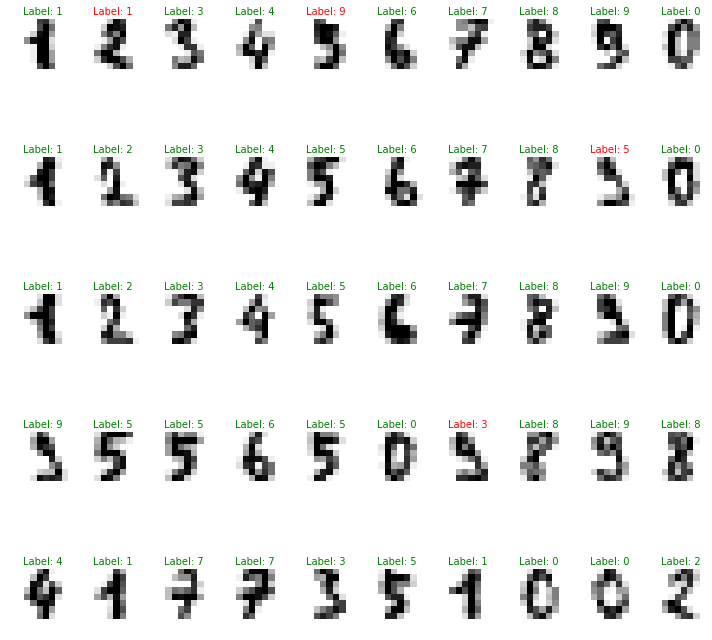

In [70]:
# Visual Confirmation of accuracy
drawPredictions()

In [80]:
# Print out the TRUE value of the 1000th digit in the test set
true_1000th_test_value = y_test[999]
print "1000th test label: ", true_1000th_test_value

1000th test label:  1


In [79]:
# Predict the value of the 1000th digit in the test set.
# Was your model's prediction correct?
# INFO: If you get a warning on your predict line, look at the
# notes from the previous module's labs.
y_predict = model.predict(X_test)
guess_1000th_test_value = y_predict[999]
print "1000th test prediction: ", guess_1000th_test_value

1000th test prediction:  1


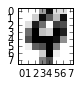

In [84]:
# Use IMSHOW to display the 1000th test image, so you can
# visually check if it was a hard image, or an easy image
plt.figure(figsize(1,1))
plt.imshow(X_train.ix[999,:].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

In [91]:
# TODO: Were you able to beat the USPS advertised accuracy score
# of 98%? If so, STOP and answer the lab questions. But if you
# weren't able to get that high of an accuracy score, go back
# and change your SVC's kernel to 'poly' and re-run your lab
# again.
print "Training SVC Classifier (with Polynomial kernal)..."
model = SVC(C=1, gamma=0.001, kernel='poly')
model.fit(X_train, y_train)

# Calculate the score of the SVC against the testing data
print "Scoring SVC Classifier (with Polynomial kernal)..."
score = model.score(X_test, y_test)
print "\nScore:", score

Training SVC Classifier (with Polynomial kernal)...
Scoring SVC Classifier (with Polynomial kernal)...

Score: 0.974944320713


In [93]:
# TODO: Were you able to beat the USPS advertised accuracy score
# of 98%? If so, STOP and answer the lab questions. But if you
# weren't able to get that high of an accuracy score, go back
# and change your SVC's kernel to 'rbf' and re-run your lab
# again.
print "Training SVC Classifier (with rbf kernal)..."
model = SVC(C=1, gamma=0.001, kernel='rbf')
model.fit(X_train, y_train)

# Calculate the score of the SVC against the testing data
print "Scoring SVC Classifier (with rbf kernal)..."
score = model.score(X_test, y_test)
print "\nScore:", score

Training SVC Classifier (with rbf kernal)...
Scoring SVC Classifier (with rbf kernal)...

Score: 0.982739420935


In [130]:
# TODO: Were you able to beat the USPS advertised accuracy score
# of 98%? If so, STOP and answer the lab questions. But if you
# weren't able to get that high of an accuracy score, go back
# and tinker with your gamma value and C value until you're able
# to beat the USPS. Don't stop tinkering until you do. =).
print "Training SVC Classifier (with rbf kernal)..."
model = SVC(C=1, gamma=0.002, kernel='rbf')
model.fit(X_train, y_train)

# Calculate the score of the SVC against the testing data
print "Scoring SVC Classifier (with rbf kernal)..."
score = model.score(X_test, y_test)
print "\nScore:", score  

Training SVC Classifier (with rbf kernal)...
Scoring SVC Classifier (with rbf kernal)...

Score: 0.985523385301


In [ ]:
# 98.55% acccuracy with C=1, gamma=0.002, with rbf kernel.
# C parameter doesn't seem to affect the accuracy. <?

In [164]:
#################################################
# TODO: Once you're able to beat the +98% accuracy score of the
# USPS, go back into the load() method. Look for the line that
# reads "# Special:"
#
# Immediately under that line, alter X_train and y_train ONLY.
# Keep just the ___FIRST___ 4% of the samples. In other words,
# for every 100 samples found, throw away 96 of them. Make sure
# all the samples (and labels) you keep come from the start of
# X_train and y_train.

# If the first 4% is a decimal number, then use int + ceil to
# round up to the nearest whole integer.

# That operation might require some Pandas indexing skills, or
# perhaps some numpy indexing skills if you'd like to go that
# route. Feel free to ask on the class forum if you want; but
# try to exercise your own muscles first, for at least 30
# minutes, by reviewing the Pandas documentation and stack
# overflow. Through that, in the process, you'll pick up a lot.
# Part of being a machine learning practitioner is know what
# questions to ask and where to ask them, so this is a great
# time to start!

# Re-Run your application after throwing away 96% your training
# data. What accuracy score do you get now?
def load(path_test, path_train):
    # Load up the data.
    with open(path_test, 'r')  as f: testing  = pd.read_csv(f)
    with open(path_train, 'r') as f: training = pd.read_csv(f)

    # The number of samples between training and testing can vary
    # But the number of features better remain the same!
    n_features = testing.shape[1]

    X_test  = testing.ix[:,:n_features-1]
    X_train = training.ix[:,:n_features-1]
    y_test  = testing.ix[:,n_features-1:].values.ravel()
    y_train = training.ix[:,n_features-1:].values.ravel()

    #
    # Special:
    X_train = X_train[: int( math.ceil(X_train.shape[0]*0.04) )]
    y_train = y_train[: int( math.ceil(y_train.shape[0]*0.04) )]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = \
    load('Module6/Datasets/optdigits.tes', 'Module6/Datasets/optdigits.tra')

In [165]:
# For my testing
len(X_train), len(X_test), len(y_train), len(y_test)

(153, 1796, 153, 1796)

Peeking your data...


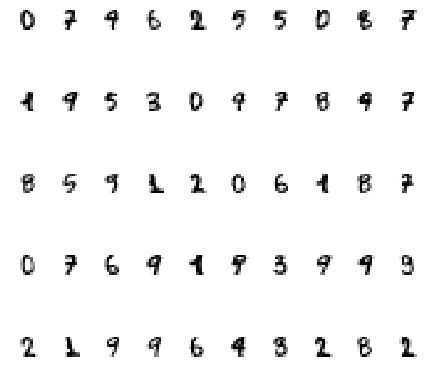

In [166]:
def peekData():
    # The 'targets' or labels are stored in y. The 'samples' or data is stored in X
    print "Peeking your data..."
    fig = plt.figure(figsize(6,6))
    
    cnt = 0
    for col in range(5):
        for row in range(10):
            plt.subplot(5, 10, cnt + 1)
            plt.imshow(X_train.ix[cnt,:].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
            plt.axis('off')
            cnt += 1
    fig.set_tight_layout(True)
    plt.show()

peekData()

In [172]:
# Training the SVC on the training with a linear kernel on
# data/labels & Calculatoing the score against the testing data
print "Training SVC Classifier (with Linear kernal)..."
model = SVC(C=1, gamma=0.001, kernel='linear')
model.fit(X_train, y_train)

# Calculate the score of the SVC against the testing data
print "Scoring SVC Classifier (with Linear kernal)..."
score = model.score(X_test, y_test)
print "\nScore:", score

Training SVC Classifier (with Linear kernal)...
Scoring SVC Classifier (with Linear kernal)...

Score: 0.854120267261


In [ ]:
# TODO: Lastly, change your kernel back to linear and run your
# assignment one last time. What's the accuracy score this time?
# Surprised?

In [174]:
# Training the SVC on the training with a polynomial kernel on
# data/labels & Calculatoing the score against the testing data
print "Training SVC Classifier (with Polynomial kernal)..."
model = SVC(C=1, gamma=0.001, kernel='poly')
model.fit(X_train, y_train)

# Calculate the score of the SVC against the testing data
print "Scoring SVC Classifier (with Polynomial kernal)..."
score = model.score(X_test, y_test)
print "\nScore:", score

Training SVC Classifier (with Polynomial kernal)...
Scoring SVC Classifier (with Polynomial kernal)...

Score: 0.865812917595


In [175]:
# Training the SVC on the training with rbf kernel on
# data/labels & Calculatoing the score against the testing data
print "Training SVC Classifier (with rbf kernal)..."
model = SVC(C=1, gamma=0.001, kernel='rbf')
model.fit(X_train, y_train)

# Calculate the score of the SVC against the testing data
print "Scoring SVC Classifier (with rbf kernal)..."
score = model.score(X_test, y_test)
print "\nScore:", score

Training SVC Classifier (with rbf kernal)...
Scoring SVC Classifier (with rbf kernal)...

Score: 0.854677060134


In [177]:
# Training the SVC on the training with rbf kernel on
# data/labels & Calculatoing the score against the testing data
print "Training SVC Classifier (with rbf kernal varying parameters)..."
model = SVC(C=1, gamma=0.002, kernel='rbf')
model.fit(X_train, y_train)

# Calculate the score of the SVC against the testing data
print "Scoring SVC Classifier (with rbf kernal varying parameters)..."
score = model.score(X_test, y_test)
print "\nScore:", score

Training SVC Classifier (with rbf kernal varying parameters)...
Scoring SVC Classifier (with rbf kernal varying parameters)...

Score: 0.840200445434


### Lab Questions 6.2.

##### Lab Question 1 (1 point possible)

In this lab, you must complete a series of steps in order to beat the USPS high score for accuracy. What was your accuracy score, as displayed by your assignment, when you first beat the USPS?


<b>* My answer</b>: 0.982739420935 (<== <b>Correct!</b>)

<b>* Explanation</b>: 
Your triumph over the USPS should have occurred once you set the kernel to rbf with a score of 0.982739420935. After that, when you dropped 96% of your training data, your accuracy should have dropped down to 0.801224944321. One you changed the kernel to linear and tried with 96% of the data agan, your score should have jumped back up to 0.831291759465.

If you're up for a challenge, check out another handwritten digits datasets, such as The [MNIST Database](http://yann.lecun.com/exdb/mnist/) of handwritten digits, and [Handwritten Digit Recognition](http://www.seewald.at/en/2009/04/handwritten_digit_recognition) to see how good you can get your classifier to perform on them.

If you need source code to load MNIST - formatted data, such as from the above two links, use the code below:

In [ ]:
def load(path_img, path_lbl):
    from array import array
    import struct

    with open(path_lbl, 'rb') as file:
        magic, size = struct.unpack(">II", file.read(8))
        if magic != 2049:
            raise ValueError('Magic number mismatch, expected 2049, got {0}'.format(magic))
        labels = array("B", file.read())

    with open(path_img, 'rb') as file:
        magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
        if magic != 2051:
            raise ValueError('Magic number mismatch, expected 2051, got {0}'.format(magic))
        image_data = array("B", file.read())

    images = []
    for i in range(size): images.append([0] * rows * cols)
    for i in range(size): images[i] = np.array(image_data[i * rows * cols:(i + 1) * rows * cols]).reshape(28,28)[::divisor,::divisor].reshape(-1)
    return pd.DataFrame(images), pd.Series(labels)

X, y = load('digits.data', 'digits.labels')

You can set <i>divisor</i> to any int, e.g. 1, 2, 3. If you set it to 1, there will be no [resampling](https://docs.python.org/2.3/whatsnew/section-slices.html) of the image. If you set it to two or higher, the image will be resamples by that factor of pixels. This, in turn, speeds up training but may reduce overall accuracy.

<b>additional links</b>
* https://github.com/anarayanan86/Microsoft_DAT210x/blob/master/Module-6---Data-Modeling-II/Module6SVC/assignment2.py
* http://matplotlib.org/users/image_tutorial.html

In [ ]:
######################################################################

### Lab Assignment 6.3.

Growing up, everyone has a hero. For many people, that hero was Muhammad Ali. He taught people it was okay to be proud of who they were, at a time when others would not accept that. He showed people how to stand up for their beliefs in the face of oppression and tyranny. He made people value themselves, and encouraged them care for those around them. He showed us what bravery truly meant, how to be a heck of a boxer, and so much more. Every single person who met Muhammad Ali, either in the ring or outside of it, had a motivating story to share about their encounter.

On June 3, 2016, Muhammad Ali passed away at the age of 74 due to septic shock. Thirty years earlier, he was diagnosed with Parkinson's syndrome, a neurodegenerative condition that doctors attributed to his boxing-related brain injuries.

![Muhammad Ali](http://courses.edx.org/asset-v1:Microsoft+DAT210x+4T2016+type@asset+block@Muhammad.png "Muhammad Ali")



Parkinson's disease itself is a long-term disorder of the nervous system that affects many aspects of a person's mobility over time. It's characterized by shaking, slowed movement, rigidity, dementia, and depression. In 2013, some 53 million people were diagnosed with it, mostly men. Other famous personalities affected by it include actor Michael J Fox, and olympic cyclist Davis Phinney.

In this lab, you will be applying SVC to the [Parkinson's Data Set](https://archive.ics.uci.edu/ml/datasets/Parkinsons), provided courtesy of UCI's Machine Learning Repository. The dataset was created at the University of Oxford, in collaboration with 10 medical centers around the US, along with Intel who developed the device used to record the primary features of the dataset: speech signals. Your goals for this assignment are first to see if it's possible to differentiate between people who have Parkinson's and who don't using SciKit-Learn's support vector classifier, and then to take a first-stab at a naive way of fine-tuning your parameters in an attempt to maximize the accuracy of your testing set.

<blockquote>"I've never really resented hard work because I've always liked it. Up every morning for roadwork. Going to the gymnasium every day at 12 o'clock. I never change my pattern."</blockquote> 

In honor of Muhammad Ali and hard work, there is no starter code for this lab. Just follow the instructions below.



In [361]:
###########################################

##### Lab Question 6.3.1 (1 point possible)

<b> Problem: </b>

- Load up the /Module6/Datasets/parkinsons.data data set into a variable X, being sure to drop the name column.
- Splice out the status column into a variable y and delete it from X.
- Perform a train/test split. 30% test group size, with a random_state equal to 7.
- Create a SVC classifier. Don't specify any parameters, just leave everything as default. Fit it against your training data and then score your testing data.

What accuracy did you score?

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import numpy as np 
matplotlib.style.use('ggplot')

In [24]:
# Load up the /Module6/Datasets/parkinsons.data data set into a variable X, 
# being sure to drop the name column.
X = pd.read_csv('Module6/Datasets/parkinsons.data')
X.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [25]:
X.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [26]:
X.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [27]:
X.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [366]:
# column 'name': ASCII subject name and recording number 

# column 'status': Health status of the subject 
#  (1: Parkinson's,  0: healthy )
X.status.unique() 

array([1, 0])

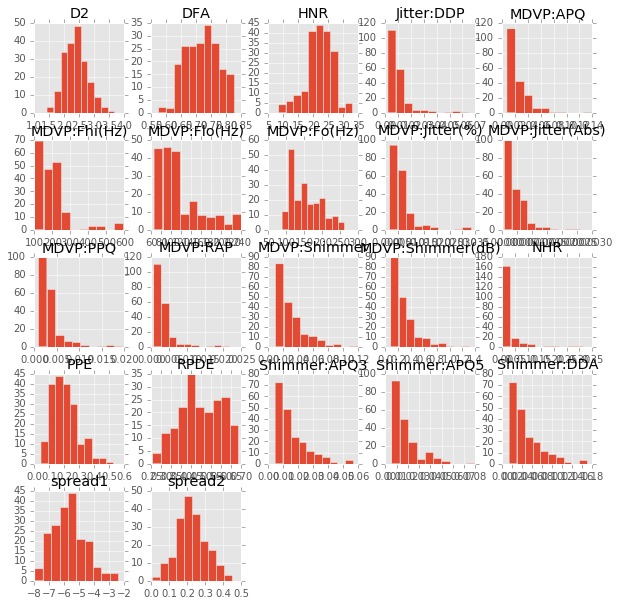

In [374]:
# histogram
X.hist(figsize(10,10))
plt.show()

In [367]:
# 2. Splice out the status column into a variable y and delete it from X.
y = X.status.copy()

In [368]:
X.drop(labels=['name', 'status'], inplace=True, axis=1)
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [369]:
# 3. Perform a train/test split. 30% test group size, with a random_state equal to 7.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

len(X_train), len(X_test), len(y_train), len(y_test)

(136, 59, 136, 59)

In [370]:
# 4. Create a SVC classifier. Don't specify any parameters, just leave everything as default. 
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [371]:
score = model.score(X_test, y_test)
print score

0.813559322034


##### Lab Question 6.3.1 

What accuracy did you score?

<b>* My answer</b>: 0.813559322034 (<== <b>Correct!</b>)

<b>* Explanation</b>: 
You should have scored 0.813559322034. If you didn't, check your dataframe and make sure you loaded it up properly, that you removed the status column, and that you properly set the parameters in the train / test split.

In [372]:
###########################################

##### Lab Question 6.3.2 (1 point possible)

<b> Problem: </b> That accuracy was just too low to be useful. We need to get it up. Once way you could go about doing that would be to manually try a bunch of combinations of C, and gamma values for your rbf kernel. But that could literally take forever. Also, you might unknowingly skip a pair of values that would have resulted in a very good accuracy.

Instead, let us allow computers to do what computers do best. Program a naive, best-parameter searcher by creating a nested for-loops. The outer for-loop should iterate a variable C from 0.05 to 2, using 0.05 unit increments. The inner for-loop should increment a variable gamma from 0.001 to 0.1, using 0.001 unit increments. As you know, Python ranges won't allow for float intervals, so you'll have to do some research on NumPy ARanges, if you don't already know how to use them.

Since the goal is to find the parameters that result in the model having the best score, you'll need a best_score = 0 variable that you initialize outside of the for-loops. Inside the for-loop, create a model and pass in the C and gamma parameters into the class constructor. Train and score the model appropriately. If the current best_score is less than the model's score, then update the best_score, being sure to print it out, along with the C and gamma values that resulted in it.

After running your assignment again, what is the highest accuracy score you are able to get?

In [373]:
# Manual parameter tuning (on scaled data using StandardScaler())
# http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
best_c = 0.0
best_gamma = 0.0
best_score = 0.0

for c in np.arange(0.05, 2, 0.05): # start, stop, step, 
    for g in np.arange(0.001, 0.01, 0.001):
        svc = SVC(kernel='rbf', C=c, gamma=g)
        svc.fit(X_train, y_train)
        if(svc.score(X_test, y_test) > best_score):
            best_score = svc.score(X_test, y_test)
            best_c = c
            best_gamma = g
            
print "Best score = {0} (C = {1}, gamma = {2})".format(best_score,best_c,best_gamma)

Best score = 0.915254237288 (C = 1.65, gamma = 0.005)


##### Lab Question 6.3.2 (1 point possible)
After running your assignment again, what is the highest accuracy score you are able to get?

<b>* My answer</b>: 0.915254237288 (<== <b>Correct!</b>)

<b>* Explanation</b>: 

You should have scored 0.915254237288, a more than 10% gain! If you didn't, check your parameters and make sure you're iterating over the double nested for-loop properly. You have to create a new SVC instance inside of the inner loop, along with train and score it.

In [ ]:
###########################################

##### Lab Question 6.3.3 (1 point possible)

<b> Problem: </b>

Wait a second. Pull open the dataset's label file from: https://archive.ics.uci.edu/ml/datasets/Parkinsons

- Look at the units on those columns: Hz, %, Abs, dB, etc. What happened to transforming your data? With all of those units interacting with one another, some pre-processing is surely in order.

- Right after you splice out the status column, but before you process the train/test split, inject SciKit-Learn pre-processing code. Unless you have a good idea which one is going to work best, you're going to have to try the various pre-processors one at a time, checking to see if they improve your predictive accuracy.

- Experiment with Normalizer(), MaxAbsScaler(), MinMaxScaler(), and StandardScaler().

After trying all of these scalers, what is the new highest accuracy score you're able to achieve?

In [447]:
# Normalize with preprocessing
X = pd.read_csv('Module6/Datasets/parkinsons.data')
X.drop(labels=['name', 'status'], inplace=True, axis=1)
X_norm = X.copy()
X_maxAbs = X.copy()
X_minMax = X.copy()
X_stds = X.copy()

X_norm = preprocessing.Normalizer().fit_transform(X_norm)
X_maxAbs = preprocessing.MaxAbsScaler().fit_transform(X_maxAbs)
X_minMax = preprocessing.MinMaxScaler().fit_transform(X_minMax)
X_stds = preprocessing.StandardScaler().fit_transform(X_stds)

In [448]:
def getAccuracyByPreprocessingModel(X_train, X_test, y_train, y_test, scaler):    
    best_c = 0.0
    best_gamma = 0.0
    best_score = 0.0

    for c in np.arange(0.05, 2, 0.05): # start, stop, step, 
        for g in np.arange(0.001, 0.1, 0.001):
            svc = SVC(kernel='rbf', C=c, gamma=g)
            svc.fit(X_train, y_train)
            if(svc.score(X_test, y_test) > best_score):
                best_score = svc.score(X_test, y_test)
                best_c = c
                best_gamma = g
    
    print "Best score of {0}: {1} (C = {2}, gamma = {3})".format(scaler, best_score,best_c,best_gamma)

In [449]:
# (a) preprocessing.Normalizer()
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=7)

getAccuracyByPreprocessingModel(X_train, X_test, y_train, y_test, "Normalizer()")

Best score of Normalizer(): 0.796610169492 (C = 0.05, gamma = 0.001)


In [450]:
# (b) preprocessing.MaxAbsScaler()
X_train, X_test, y_train, y_test = train_test_split(X_maxAbs, y, test_size=0.3, random_state=7)

getAccuracyByPreprocessingModel(X_train, X_test, y_train, y_test, "MaxAbsScaler()")

Best score of MaxAbsScaler(): 0.881355932203 (C = 1.2, gamma = 0.098)


In [444]:
# (c) preprocessing.MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X_minMax, y, test_size=0.3, random_state=7)

getAccuracyByPreprocessingModel(X_train, X_test, y_train, y_test, "MinMaxScaler()")

Best score of MinMaxScaler(): 0.881355932203 (C = 0.75, gamma = 0.098)


In [451]:
# (d) preprocessing.StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X_stds, y, test_size=0.3, random_state=7)

getAccuracyByPreprocessingModel(X_train, X_test, y_train, y_test, "StandardScaler()")

Best score of StandardScaler(): 0.932203389831 (C = 1.55, gamma = 0.097)


##### Lab Question 6.3.3 (1 point possible)

After trying all of these scalers, what is the new highest accuracy score you're able to achieve?

<b>* My answer</b>: 0.932203389831 (<== <b>Correct!</b>)

<b>* Explanation</b>: 

You should have scored 0.932203389831.
These are the scores you should have received for each scaler.

- StandardScaler() 0.932203389831
- MinMaxScaler() 0.881355932203
- MaxAbsScaler() 0.881355932203
- Normalizer() 0.796610169492

In [426]:
# My testing: Manual parameter values (with StandardScaler)
# http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
best_c = 0.0
best_gamma = 0.0
best_score = 0.0

for c in np.arange(1e-2, 1e2, 1): # start, stop, step, 
    for g in np.arange(1e-1, 1e1, 1):
        svc = SVC(kernel='rbf', C=c, gamma=g)
        svc.fit(X_train, y_train)
        if(svc.score(X_test, y_test) > best_score):
            best_score = svc.score(X_test, y_test)
            best_c = c
            best_gamma = g
            
print "Best score = {0} (C = {1}, gamma = {2})".format(best_score,best_c,best_gamma)

Best score = 0.966101694915 (C = 4.01, gamma = 0.1)


In [ ]:
###########################################

##### Lab Question 6.3.4

<b> Problem: </b>
The accuracy score keeps creeping upwards. Let's have one more go at it. Remember how in a previous lab we discovered that SVM's are a bit sensitive to outliers and that just throwing all of our unfiltered, dirty or noisy data at it, particularly in high-dimensionality space, can actually cause the accuracy score to suffer?

Well, let's try to get rid of some useless features. Immediately after you do the pre-processing, run ISO on your dataset. The original dataset has 22 columns and 1 label column. So try experimenting with PCA n_component values between 4 and 14. Are you able to get a better accuracy?

If you are not, then forget about PCA entirely, unless you want to visualize your data. However if you are able to get a higher score, then be *sure* keep that figure in mind, and comment out all the PCA code.

In the same spot, run Isomap on the data, before sending it to the train / test split. Manually experiment with every inclusive combination of n_neighbors between 2 and 5, and n_components between 4 and 6. Are you able to get a better accuracy?

If you are not, then forget about isomap entirely, unless you want to visualize your data. However if you are able to get a higher score, then be *sure* keep that figure in mind.

If either PCA or Isomap helped you out, then uncomment out the appropriate transformation code so that you have the highest accuracy possible.

What is your highest accuracy score on this assignment to date?

In [ ]:
# Well, let's try to get rid of some useless features. Immediately after 
# you do the pre-processing, run ISO on your dataset. The original dataset 
# has 22 columns and 1 label column. So try experimenting with PCA n_component 
# values between 4 and 14. Are you able to get a better accuracy?

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%pylab inline 
import pandas as pd
import numpy as np 
matplotlib.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import preprocessing
from sklearn.decomposition import PCA  
from sklearn import manifold
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC

In [3]:
# Load up the /Module6/Datasets/parkinsons.data data set into a variable X, 
# being sure to drop the name column.
X = pd.read_csv('Module6/Datasets/parkinsons.data')
X.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
y = X.status.copy()
len(y)

195

In [5]:
X.drop(labels=['name', 'status'], inplace=True, axis=1)
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [17]:
# Normalize the data with StandardScaler()
X_stds_pac = X.copy() # copy of X for PCA analysis
X_stds_pac = preprocessing.StandardScaler().fit_transform(X_stds_pac)

X_stds_iso = X_stds_pac.copy() # copy of X for ISOMap analysis
X_stds_iso2 = X_stds_pac.copy() 

In [18]:
def getAccuracyByPreprocessingModel_pca(X_train, X_test, y_train, y_test, scaler, n_components):    
    best_c = 0.0
    best_gamma = 0.0
    best_score = 0.0

    for c in np.arange(0.05, 2, 0.05): # start, stop, step, 
        for g in np.arange(0.001, 0.1, 0.001):
            svc = SVC(kernel='rbf', C=c, gamma=g)
            svc.fit(X_train, y_train)
            if(svc.score(X_test, y_test) > best_score):
                best_score = svc.score(X_test, y_test)
                best_c = c
                best_gamma = g
    
    print "Best score of {0}: {1} (C = {2}, gamma = {3}, n_components = {4})".format(scaler, best_score,best_c,best_gamma, n_components)

In [19]:
# PCA
for i in range(4, 15):
    pca = PCA(n_components=i)
    pca_trans = pca.fit_transform(X_stds_pac)
    X_train, X_test, y_train, y_test = train_test_split(pca_trans, y, test_size=0.3, random_state=7)
    getAccuracyByPreprocessingModel_pca(X_train, X_test, y_train, y_test, "StandardScaler()", i)

Best score of StandardScaler(): 0.898305084746 (C = 0.55, gamma = 0.094, n_components = 4)
Best score of StandardScaler(): 0.915254237288 (C = 0.45, gamma = 0.065, n_components = 5)
Best score of StandardScaler(): 0.915254237288 (C = 0.55, gamma = 0.098, n_components = 6)
Best score of StandardScaler(): 0.932203389831 (C = 1.75, gamma = 0.099, n_components = 7)
Best score of StandardScaler(): 0.932203389831 (C = 1.65, gamma = 0.098, n_components = 8)
Best score of StandardScaler(): 0.932203389831 (C = 1.55, gamma = 0.098, n_components = 9)
Best score of StandardScaler(): 0.932203389831 (C = 1.55, gamma = 0.096, n_components = 10)
Best score of StandardScaler(): 0.932203389831 (C = 1.6, gamma = 0.096, n_components = 11)
Best score of StandardScaler(): 0.932203389831 (C = 1.45, gamma = 0.098, n_components = 12)
Best score of StandardScaler(): 0.932203389831 (C = 1.5, gamma = 0.097, n_components = 13)
Best score of StandardScaler(): 0.932203389831 (C = 1.45, gamma = 0.099, n_components = 

In [31]:
# ==> Same accuracy (0.932203389831) despite varying PCA n_components values between 4 & 14

In [ ]:
# If you are not, then forget about PCA entirely, unless you want to 
# visualize your data. However if you are able to get a higher score, 
# then be sure keep that figure in mind, and comment out all the PCA code.

# In the same spot, run Isomap on the data, before sending it to the train/test 
# split. Manually experiment with every inclusive combination of n_neighbors 
# between 2 and 5, and n_components between 4 and 6. Are you able to get a 
# better accuracy?

In [16]:
# Isomap
best_svc_iso_score = 0.0
n_comp = 0
n_neigh = 0

for j in range(2,6): # n_neighbors
    for k in range(4,7): # n_components
        iso = manifold.Isomap(n_neighbors=j, n_components=k)
        trans_iso = iso.fit_transform(X_stds_iso)
        X_train, X_test, y_train, y_test = train_test_split(trans_iso, y, test_size=0.3, random_state=7)
        svc = SVC()
        svc.fit(X_train, y_train)    
        score = svc.score(X_test, y_test)
        if score > best_svc_iso_score: 
            best_svc_iso_score = score
            n_neigh = j
            n_comp = k
        print "Accuracy = {0} (n_neighbors = {1}, n_components = {2})".format(score, j, k)

print "\nBest score = {0}, n_neighbors = {1}, n_components = {2})".format(best_svc_iso_score, n_neigh, n_comp)

Accuracy = 0.898305084746 (n_neighbors = 2, n_components = 4)
Accuracy = 0.915254237288 (n_neighbors = 2, n_components = 5)
Accuracy = 0.898305084746 (n_neighbors = 2, n_components = 6)
Accuracy = 0.898305084746 (n_neighbors = 3, n_components = 4)
Accuracy = 0.898305084746 (n_neighbors = 3, n_components = 5)
Accuracy = 0.898305084746 (n_neighbors = 3, n_components = 6)
Accuracy = 0.898305084746 (n_neighbors = 4, n_components = 4)
Accuracy = 0.898305084746 (n_neighbors = 4, n_components = 5)
Accuracy = 0.898305084746 (n_neighbors = 4, n_components = 6)
Accuracy = 0.864406779661 (n_neighbors = 5, n_components = 4)
Accuracy = 0.864406779661 (n_neighbors = 5, n_components = 5)
Accuracy = 0.881355932203 (n_neighbors = 5, n_components = 6)

Best score = 0.915254237288, n_neighbors = 2, n_components = 5)


In [14]:
# ==> The best score with isomap (0.915254237288) is below the previous best score (0.932203389831)

In [ ]:
# If you are not, then forget about isomap entirely, unless you want to 
# visualize your data. However if you are able to get a higher score, 
# then be sure keep that figure in mind.

# If either PCA or Isomap helped you out, then uncomment out the appropriate 
# transformation code so that you have the highest accuracy possible.
# What is your highest accuracy score on this assignment to date?

In [22]:
# Isomap anslysis 2
best_score = 0.0
n_comp = 0
n_neigh = 0
best_c = 0.0
best_gamma = 0.0

for j in range(2,6): # n_neighbors
    for k in range(4,7): # n_components
        iso = manifold.Isomap(n_neighbors=j, n_components=k)
        trans_iso = iso.fit_transform(X_stds_iso2)
        X_train, X_test, y_train, y_test = train_test_split(trans_iso, y, test_size=0.3, random_state=7)

        for c in np.arange(0.05, 2, 0.05): # start, stop, step, 
            for g in np.arange(0.001, 0.1, 0.001):
                svc = SVC(kernel='rbf', C=c, gamma=g)
                svc.fit(X_train, y_train)    
                score = svc.score(X_test, y_test)
                if score > best_score: 
                    best_score = score
                    n_neigh = j
                    n_comp = k
                    best_c = c
                    best_gamma = g
                #print "Score = {0} (c = {1}, gamma = {2}, n_neighbors = {3}, n_components = {4})".format(score, c, g, j, k)

print "\nBest score = {0} (c = {1}, gamma = {2}, n_neighbors = {3}, n_components = {4})".format(best_score, best_c, best_gamma, n_neigh, n_comp )


Best score = 0.966101694915 (c = 1.7, gamma = 0.06, n_neighbors = 2, n_components = 4)


In [ ]:
# ==> Better accuracy (0.966101694915) than the previous one (0.932203389831)

##### Lab Question 6.3.4 (1 point possible)

What is your highest accuracy score on this assignment to date?

<b>* My answer</b>: 0.966101694915 (<== <b>Correct!</b>)

<b>* Explanation</b>: 
You should have scored 0.966101694915, an amazing improvement over your original 0.813559322034 score. Your classifier isn't great yet, but at least it's useable. There are a few more tricks you can use to get it better yet, but that'll have to wait for another lab.

In [ ]:
###########################################